# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This problem is very similar to a prediction problem wherein the client, which in this case is the car dealership, wants to know what the most profitable car is in order to maximize the amount of money gained. This can be solved by developing a predictive model based on the data from the provided dataset. The dataset has several pieces of information that can be useful such as the region, year, price, model and condition along with several other factors that can be used to produce an effective model. Our model can provide the client with valuable insight into what the users in each region find most valuable and manage their inventory to match those preferences. 


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from random import shuffle


In [68]:
df = pd.read_csv('data/vehicles.csv')
df.head() 

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [69]:
df.describe()
#df.info()


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [70]:
missing_data = df.isnull().sum()
print(f"Missing Data:\n{missing_data[missing_data > 0]}")

Missing Data:
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


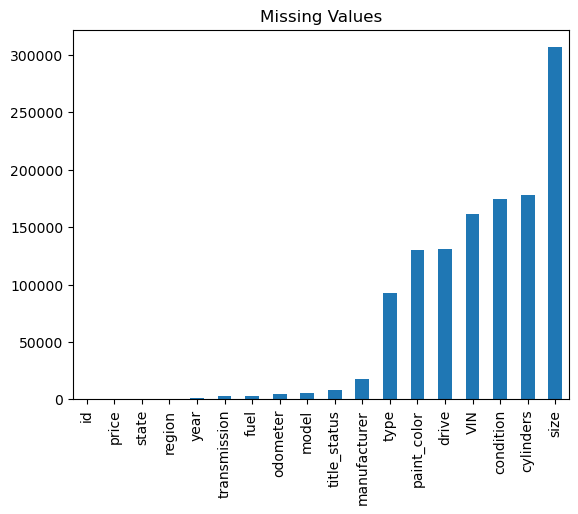

In [71]:
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Missing Values')
plt.show()
#details like size, cylinders, and VIN are largely missing
#details like id, price, state, region are always there

In [72]:
print(df.dtypes)


id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [73]:
data = df.copy()
data = data.dropna()


In [74]:
#engineering features like age
data['age'] = 2024 - data['year']
data.describe()


,id,price,year,odometer,age
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04,34868.000000
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05,12.823133
std,4.299751e+06,13460.056823,7.162332,9.990878e+04,7.162332
min,7.301592e+09,0.000000,1905.000000,0.000000e+00,2.000000
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04,8.000000
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05,11.000000
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05,16.000000
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06,119.000000


In [ ]:
#set price as target
X = pd.get_dummies(data[['age', 'odometer', 'year']])
X.describe()
y = data['price']

In [76]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head()


(27894, 3) (6974, 3)


,age,odometer,year
392966,7.0,41745.0,2017.0
149173,10.0,15886.0,2014.0
227838,18.0,175000.0,2006.0
18463,6.0,66431.0,2018.0
158985,7.0,29405.0,2017.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [77]:
lr = LinearRegression(fit_intercept=False).fit(X_train, y_train)
model_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
print(mse)

159008427.64921108


In [97]:
linear_pipeline = Pipeline([('features', PolynomialFeatures(degree=2)), ('model', LinearRegression(fit_intercept=False))])
linear_pipeline.fit(X_train, y_train)
model_preds = linear_pipeline.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
print(mse)

147264644.24418348


In [78]:
#lasso regression
auto_pipe = Pipeline([('polyfeatures' , PolynomialFeatures(degree=2)),('scaler', StandardScaler()), ('lasso', Lasso(random_state=42))]).fit(X_train, y_train)
model_preds = auto_pipe.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
print(mse)


147264302.90876043


In [93]:
#sequential feature selection
sfs = SequentialFeatureSelector(LinearRegression(), scoring = 'neg_mean_squared_error', n_features_to_select=2)
sfs.fit(X_train, y_train)
features = sfs.get_support()
print("selected features:", sfs.get_support())
sfs_train = X_train.columns[features]
sfs_test = X_test.columns[features]

#fitting based on selected features
lr = LinearRegression(fit_intercept=False).fit(X_train[sfs_train], y_train)
model_preds = lr.predict(X_test[sfs_test])
mse = mean_squared_error(y_test, model_preds)
print(mse)



selected features: [ True False  True]
164360420.90167844


In [94]:
#ridge regression
ridge = Ridge().fit(X_train, y_train)
model_preds = ridge.predict(X_test)
mse = mean_squared_error(y_test, model_preds)
model_coefs = ridge.coef_

print(model_coefs)
print(mse)


[-2.04480453e+02 -1.80634865e-02  2.04480453e+02]
159008428.12536806


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.